In [7]:
import numpy as np 

#Get the interactive Tools for Matplotlib

%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

from sklearn.decomposition import PCA

import gensim.downloader as api 
from gensim.models import KeyedVectors

In [9]:
word_vectors = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [73]:
word_vectors['car']
vector1 = word_vectors['car']

In [75]:
word_vectors['bus']
vector2 = word_vectors['bus']

In [77]:
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

similarity = cosine_similarity(vector1, vector2)
print(f"Cosine Similarity (car ve bus): {similarity}")

Cosine Similarity (car ve bus): 0.7372706532478333


In [79]:
def euclidean_distance(vec1, vec2):
    return np.linalg.norm(vec1 - vec2)

distance = euclidean_distance(vector1, vector2)
print(f"Euclidean Distance (car ve bus): {distance}")

Euclidean Distance (car ve bus): 4.480329990386963


In [81]:
similar_words_to_car = word_vectors.most_similar('car', topn=5)
similar_words_to_bus = word_vectors.most_similar('bus', topn=5)

print("Similar words for car:", similar_words_to_car)
print("Similar word for bus:", similar_words_to_bus)

Similar words for car: [('vehicle', 0.8630837798118591), ('truck', 0.8597877025604248), ('cars', 0.837166965007782), ('driver', 0.8185910582542419), ('driving', 0.781263530254364)]
Similar word for bus: [('train', 0.8473864793777466), ('buses', 0.813403844833374), ('commuter', 0.7929050922393799), ('taxi', 0.7858030200004578), ('passenger', 0.7665839195251465)]


In [83]:
similar_to_car = set([word for word, _ in word_vectors.most_similar('car', topn=10)])
similar_to_bus = set([word for word, _ in word_vectors.most_similar('bus', topn=10)])

common_neighbors = similar_to_car.intersection(similar_to_bus)
print("Similar Neighbors:", common_neighbors)

Similar Neighbors: {'taxi', 'truck'}


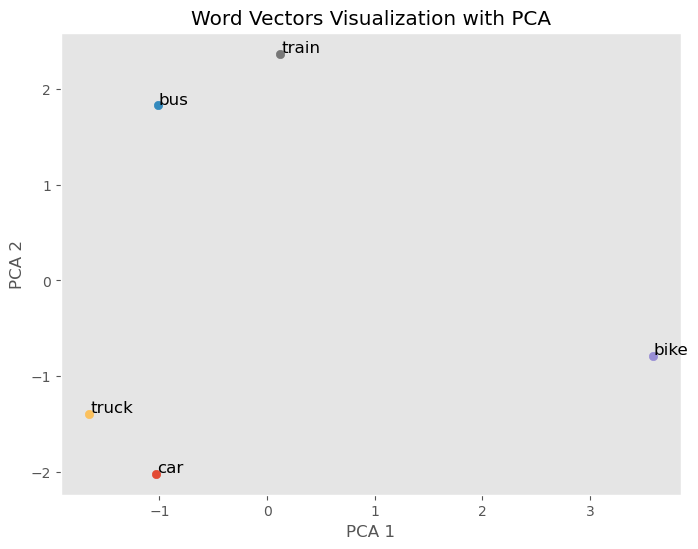

In [85]:
words = ['car', 'bus', 'bike', 'train', 'truck']
vectors = [word_vectors[word] for word in words]

# Reduce to 2 dimensions with PCA
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

# Visualization
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(result[i, 0], result[i, 1])
    plt.text(result[i, 0] + 0.01, result[i, 1] + 0.01, word, fontsize=12)

plt.title("Word Vectors Visualization with PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid()
plt.show()

Gensim Model Function For Similarity

In [88]:
# Similarity between two word
similarity = word_vectors.similarity('book', 'magazine')
print(f"Similarity between 'book' and 'magazine': {similarity}")

Similarity between 'book' and 'magazine': 0.7210058569908142


In [90]:
# Most similar 5(topn) words
similar_words = word_vectors.most_similar('book', topn=5)
print("Words most similar to 'book':")
for word, score in similar_words:
    print(f"{word}: {score}")

Words most similar to 'book':
books: 0.847648561000824
novel: 0.8181167244911194
published: 0.8023924231529236
story: 0.7941390872001648
author: 0.7937874794006348


In [92]:
# Which word is different from others?
odd_one_out = word_vectors.doesnt_match(['book', 'novel', 'magazine', 'banana'])
print(f"The odd one out is: {odd_one_out}")

The odd one out is: banana


In [94]:
# Similarity between the two groups
group_similarity = word_vectors.n_similarity(['book', 'novel', 'magazine'], ['author', 'writer', 'story'])
print(f"Similarity between the two groups: {group_similarity}")

Similarity between the two groups: 0.8597368001937866


In [96]:
# Similarity words for 'book' vector
vector = word_vectors['book']
similar_to_vector = word_vectors.similar_by_vector(vector, topn=5)
print("Words similar to 'book' vector:")
print(similar_to_vector)

Words similar to 'book' vector:
[('book', 1.0000001192092896), ('books', 0.847648561000824), ('novel', 0.8181167244911194), ('published', 0.8023923635482788), ('story', 0.7941390872001648)]


In [98]:
# The rank of the word 'author' among the most similar ones for 'book'
rank = word_vectors.rank('book', 'author')
print(f"Rank of 'author' for 'book': {rank}")

Rank of 'author' for 'book': 5


In [100]:
# Analogy with Positive and Negative parameters
result = word_vectors.most_similar(positive=["woman", "king"], negative=["man"], topn=1)
print(f"Result of analogy ('woman' + 'king' - 'man'): {result}")

Result of analogy ('woman' + 'king' - 'man'): [('queen', 0.7698540687561035)]


![Example Image](vectorComp.png)